# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [473]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [474]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [475]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [476]:
# 2. Get the total drivers for each city type
duplicated_clean = pyber_data_df.drop_duplicates(subset=['city'])
total_drivers = duplicated_clean.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [477]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [478]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = total_fares / total_rides
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [479]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares / total_drivers
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [480]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({'Total Rides': total_rides, 
                              'Total Drivers': total_drivers,
                              'Total Fares': total_fares, 
                              'Average Fare per Ride': average_fare_per_ride,
                              'Average Fare per Driver': average_fare_per_driver})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [481]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [482]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [483]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


In [484]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
df

type   date         
Rural  1/1/19 9:45      43.69
       1/11/19 4:39     16.42
       1/14/19 15:58    54.10
       1/14/19 7:09     18.05
       1/15/19 21:44    30.26
                        ...  
Urban  5/8/19 1:54      32.69
       5/8/19 2:31      41.33
       5/8/19 4:20      21.99
       5/8/19 4:39      18.45
       5/8/19 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [485]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_pivot = df.reset_index()

In [486]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot = pd.pivot_table(pyber_pivot, values='fare', index = 'date', columns ='type')

pyber_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
1/1/19 14:52,NaN,31.15,NaN
1/1/19 17:22,NaN,NaN,42.11
1/1/19 21:04,NaN,NaN,11.71
1/1/19 2:07,NaN,24.07,NaN


In [487]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
challenge_pivot = pyber_pivot.loc["1/1/2019":"4/29/2019"] 
challenge_pivot

type,Rural,Suburban,Urban
date,,,
1/10/19 0:17,NaN,47.52,NaN
1/10/19 11:08,NaN,37.96,NaN
1/10/19 11:10,NaN,40.20,NaN
1/10/19 11:15,NaN,24.65,NaN
1/10/19 12:17,NaN,NaN,12.74
...,...,...,...
4/29/19 6:08,NaN,17.99,NaN
4/29/19 6:57,NaN,NaN,23.99
4/29/19 7:09,NaN,34.77,NaN


In [488]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
challenge_pivot.index = pd.to_datetime(challenge_pivot.index)

# df.index = pd.to_datetime(df.index)
challenge_pivot.index

DatetimeIndex(['2019-01-10 00:17:00', '2019-01-10 11:08:00',
               '2019-01-10 11:10:00', '2019-01-10 11:15:00',
               '2019-01-10 12:17:00', '2019-01-10 12:41:00',
               '2019-01-10 17:29:00', '2019-01-10 19:17:00',
               '2019-01-10 23:48:00', '2019-01-10 02:31:00',
               ...
               '2019-04-29 22:08:00', '2019-04-29 23:05:00',
               '2019-04-29 23:10:00', '2019-04-29 02:04:00',
               '2019-04-29 02:49:00', '2019-04-29 06:08:00',
               '2019-04-29 06:57:00', '2019-04-29 07:09:00',
               '2019-04-29 07:38:00', '2019-04-29 07:50:00'],
              dtype='datetime64[ns]', name='date', length=2067, freq=None)

In [489]:
# 7. Check that the datatype for the index is datetime using df.info()
challenge_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2067 entries, 2019-01-10 00:17:00 to 2019-04-29 07:50:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     106 non-null    float64
 1   Suburban  540 non-null    float64
 2   Urban     1423 non-null   float64
dtypes: float64(3)
memory usage: 64.6 KB


In [490]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df = challenge_pivot.resample('W').sum()
df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,144.23,593.08,1533.90
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


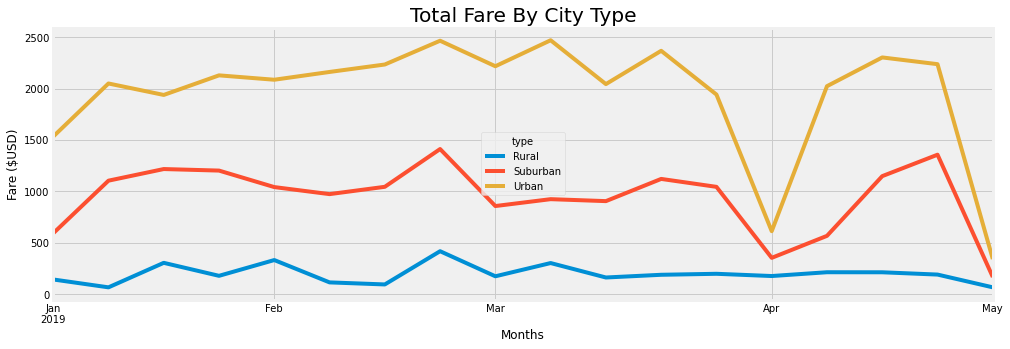

In [491]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
df.plot(figsize = (15,5))
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.title("Total Fare By City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("Months")

plt.savefig("resources/PyBer_fare_summary.png",dpi= 300, bbox_inches='tight')